In [16]:
import requests
import os
import datetime
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from dotenv import load_dotenv
from panel.interact import interact
%matplotlib inline
import numpy as np

In [2]:
zip_list=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,10463, 10471, 10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473,11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237,10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036,10029, 10035, 10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 10032, 10033, 10034, 10040 ,11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378, 10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305, 10314]

In [3]:
bronx=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,10463, 10471, 10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473]

brooklyn=[11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237]

manhattan=[10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036,10029, 10035, 10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 10032, 10033, 10034, 10040]

queens=[11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378]

staten_island=[10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305, 10314]

In [4]:
rent_path=Path("data/Zip_Rent_2015.csv")
rent_df=pd.read_csv(rent_path)

rent_ny_df=rent_df[rent_df['City'] == "New York"]
#rent_ny_df.fillna(0,inplace=True)
rent_ny_df.reset_index(inplace=True)        
rent_ny_df.drop(columns=['RegionID','index','SizeRank','Metro','State','City','CountyName'],inplace=True)
rent_ny_df.rename(columns={"RegionName": "Zip_Code"},inplace=True) 
rent_ny_df['Borough']=pd.Series()
column_names_rent=list(rent_ny_df.columns.values)
rent_ny_df=rent_ny_df[['Zip_Code','Borough' , '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01']]

for i in range(len(rent_ny_df)):
    if rent_ny_df.iloc[i,0] in bronx:
        rent_ny_df.iloc[i,1]='Bronx'
    elif rent_ny_df.iloc[i,0] in brooklyn:
        rent_ny_df.iloc[i,1]='Brooklyn'
    elif rent_ny_df.iloc[i,0] in manhattan:
        rent_ny_df.iloc[i,1]='Manhattan'
    elif rent_ny_df.iloc[i,0] in queens:
         rent_ny_df.iloc[i,1]='Queens'
    elif rent_ny_df.iloc[i,0] in staten_island:
         rent_ny_df.iloc[i,1]='Staten Island'
    
rent_ny_df.head()


C:\Users\shake\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\shake\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\shake\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Zip_Code,Borough,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,10025,Manhattan,3682.0,3767.0,3767.0,3811.0,3793.0,3894.0,3919.0,NaN,...,3785.0,3788.0,3786.0,3784.0,3766.0,3779.0,3843.0,3873.0,3835.0,NaN
1,10023,Manhattan,NaN,4011.0,3985.0,4026.0,4012.0,NaN,NaN,NaN,...,3874.0,3898.0,3917.0,3929.0,3931.0,3963.0,NaN,4123.0,4079.0,NaN
2,10002,Manhattan,NaN,4266.0,4205.0,4145.0,4062.0,NaN,NaN,NaN,...,3643.0,3673.0,3704.0,3738.0,3762.0,3794.0,3722.0,3759.0,3656.0,3605.0
3,11226,Brooklyn,1947.0,1951.0,1976.0,2026.0,2052.0,2061.0,2105.0,2116.0,...,2117.0,2116.0,2117.0,2127.0,2141.0,2165.0,2219.0,NaN,2167.0,2174.0
4,10467,Bronx,1451.0,1460.0,1445.0,1439.0,1412.0,1412.0,1430.0,1449.0,...,1745.0,1737.0,1728.0,1720.0,1723.0,1731.0,NaN,1802.0,1804.0,1842.0


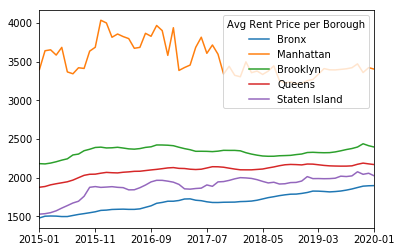

In [6]:
avg_rent_price_per_borough=rent_ny_df.drop(columns='Zip_Code')
avg_rent_price_per_borough.set_index(avg_rent_price_per_borough['Borough'],inplace=True)
avg_rent_price_per_borough.drop(columns='Borough',inplace=True)
avg_rent_price_per_borough=avg_rent_price_per_borough.groupby('Borough').mean()
ax=avg_rent_price_per_borough.loc['Bronx'].plot()
avg_rent_price_per_borough.loc['Manhattan'].plot(ax=ax)
avg_rent_price_per_borough.loc['Brooklyn'].plot(ax=ax)
avg_rent_price_per_borough.loc['Queens'].plot(ax=ax)
avg_rent_price_per_borough.loc['Staten Island'].plot(ax=ax)
ax.legend(['Bronx','Manhattan','Brooklyn','Queens','Staten Island'],title='Avg Rent Price per Borough')

In [7]:
avg_rent_price_per_borough=rent_ny_df.drop(columns='Zip_Code').groupby(['Borough']).mean()
def plot_avg_rent_price_per_borough (borough):
    return(avg_rent_price_per_borough.loc[borough].hvplot.line( rot=90,
                                                               label=f'Avg Rent Price In {borough}',
                                                               xlabel='Date',
                                                               ylabel="Price"
    ))
list_of_boroughs=['Manhattan','Brooklyn','Queens','Bronx','Staten Island']
interact(plot_avg_rent_price_per_borough,borough=list_of_boroughs)

Column
    [0] Column
        [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
    [1] Row
        [0] HoloViews(Curve, name='interactive01610')

In [9]:
#Avg dale prices by quarter for borough
avg_rent_df=rent_ny_df.drop(columns='Zip_Code')
avg_rent_df=avg_rent_df.groupby('Borough').mean()
avg_rent_df=avg_rent_df.transpose()

list_quarters=[]

for i in range(0,63,3):
    list_quarters.append(avg_rent_df.iloc[i:i+3].mean().to_list())
index=['2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1']

quarter_rent_df=pd.DataFrame(list_quarters,columns=('Bronx','Brooklyn','Manhattan','Queens','Staten Island'),index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1'))
quarter_rent_df

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
2015-Q1,1495.754941,2183.284314,3565.471510,1890.415205,1537.305556
2015-Q2,1499.579710,2226.117647,3546.814282,1934.654971,1606.222222
2015-Q3,1524.159420,2316.440842,3393.259019,2000.231099,1709.625000
2015-Q4,1561.304348,2384.872549,3786.904551,2049.690058,1878.777778
2016-Q1,1587.463768,2388.568627,3892.253333,2065.175439,1879.700000
2016-Q2,1591.536232,2375.490196,3766.184930,2076.321637,1852.885185
2016-Q3,1616.876153,2389.627451,3794.189683,2092.292398,1907.328571
2016-Q4,1681.856522,2422.372549,3817.956349,2117.192982,1962.731481
2017-Q1,1708.661397,2394.774510,3584.146825,2123.643275,1904.018687
2017-Q2,1712.782609,2348.568925,3653.159431,2108.695906,1859.305556


In [18]:
monthly_returns=(avg_rent_price_per_borough.transpose()).pct_change()
avg_mothly_return_bronx=monthly_returns.mean()['Bronx']
avg_mothly_return_brooklyn=monthly_returns.mean()['Brooklyn']
avg_mothly_return_manhattan=monthly_returns.mean()['Manhattan']
avg_mothly_return_queens=monthly_returns.mean()['Queens']
avg_mothly_return_staten_island=monthly_returns.mean()['Staten Island']

In [19]:
std_bronx=monthly_returns.std()['Bronx']
std_brooklyn=monthly_returns.std()['Brooklyn']
std_manhattan=monthly_returns.std()['Manhattan']
std_queens=monthly_returns.std()['Queens']
std_staten_island=monthly_returns.std()['Staten Island']

In [20]:
last_month_price_bronx=(avg_rent_price_per_borough.transpose()).iloc[-1][0]
last_month_price_brooklyn=(avg_rent_price_per_borough.transpose()).iloc[-1][1]
last_month_price_manhattan=(avg_rent_price_per_borough.transpose()).iloc[-1][2]
last_month_price_queens=(avg_rent_price_per_borough.transpose()).iloc[-1][3]
last_month_price_staten_island=(avg_rent_price_per_borough.transpose()).iloc[-1][4]

In [21]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 12 * 5
monte_carlo_manhattan=pd.DataFrame()
monte_carlo_bronx=pd.DataFrame()
monte_carlo_brooklyn=pd.DataFrame()
monte_carlo_staten_island=pd.DataFrame()
monte_carlo_queens=pd.DataFrame()
simulated_price_df = pd.DataFrame()

In [22]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    simulation_prices_bronx=[last_month_price_bronx]
    simulation_prices_brooklyn=[last_month_price_brooklyn]
    simulation_prices_manhattan=[last_month_price_manhattan]
    simulation_prices_queens=[last_month_price_queens]
    simulation_prices_staten_island=[last_month_price_staten_island]
    for i in range(number_records):  
         price_bronx= simulation_prices_bronx[-1] * (1 + np.random.normal(avg_mothly_return_bronx,std_bronx))
         price_brooklyn= simulation_prices_brooklyn[-1] * (1 + np.random.normal(avg_mothly_return_brooklyn,std_brooklyn))
         price_manhattan= simulation_prices_manhattan[-1] * (1 + np.random.normal(avg_mothly_return_manhattan,std_manhattan))
         price_queens= simulation_prices_queens[-1] * (1 + np.random.normal(avg_mothly_return_queens,std_queens))
         price_staten_island= simulation_prices_staten_island[-1] * (1 + np.random.normal(avg_mothly_return_staten_island,std_staten_island))
         
         simulation_prices_bronx.append(price_bronx)
         simulation_prices_brooklyn.append(price_brooklyn)
         simulation_prices_manhattan.append(price_manhattan)
         simulation_prices_queens.append(price_queens)
         simulation_prices_staten_island.append(price_staten_island)
         
   

    simulated_price_df['Bronx']=pd.Series(simulation_prices_bronx)
    simulated_price_df['Manhattan']=pd.Series(simulation_prices_manhattan)
    simulated_price_df['Brooklyn']=pd.Series(simulation_prices_brooklyn)
    simulated_price_df['Queens']=pd.Series(simulation_prices_queens)
    simulated_price_df['Staten Island']=pd.Series(simulation_prices_staten_island)
    
    
    
    
    # Calculate the daily returns of simulated prices
    simulated_monthly_returns_manhattan=simulated_price_df['Manhattan'].pct_change()
    simulated_monthly_returns_bronx=simulated_price_df['Bronx'].pct_change()
    simulated_monthly_returns_brooklyn=simulated_price_df['Brooklyn'].pct_change()
    simulated_monthly_returns_queens=simulated_price_df['Queens'].pct_change()
    simulated_monthly_returns_staten_island=simulated_price_df['Staten Island'].pct_change()
        
 

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    
    # Calculate the normalized, cumulative return series
    monte_carlo_bronx[x]=(1+simulated_monthly_returns_bronx.fillna(0)).cumprod()
    monte_carlo_manhattan[x]=(1+simulated_monthly_returns_manhattan.fillna(0)).cumprod()
    monte_carlo_brooklyn[x]=(1+simulated_monthly_returns_brooklyn.fillna(0)).cumprod()
    monte_carlo_queens[x]=(1+simulated_monthly_returns_queens.fillna(0)).cumprod()
    monte_carlo_staten_island[x]=(1+simulated_monthly_returns_staten_island.fillna(0)).cumprod()

# Print records from the DataFrame



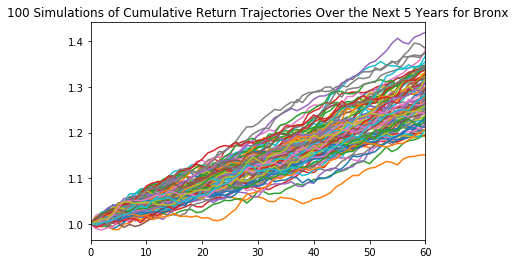

In [23]:
plot_title = f"{x+1} Simulations of Cumulative Return Trajectories Over the Next 5 Years for Bronx"
monte_carlo_bronx.plot(legend=None,title=plot_title)

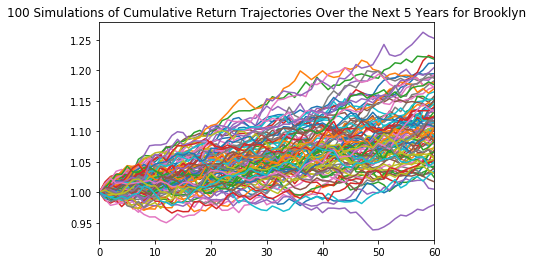

In [24]:
plot_title = f"{x+1} Simulations of Cumulative Return Trajectories Over the Next 5 Years for Brooklyn"
monte_carlo_brooklyn.plot(legend=None,title=plot_title)

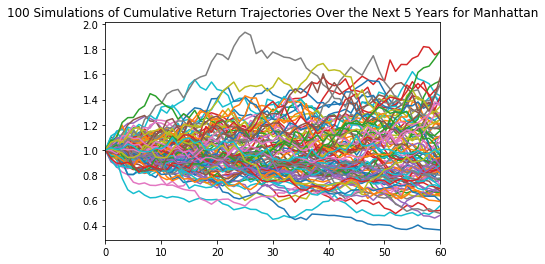

In [25]:
plot_title = f"{x+1} Simulations of Cumulative Return Trajectories Over the Next 5 Years for Manhattan"
monte_carlo_manhattan.plot(legend=None,title=plot_title)

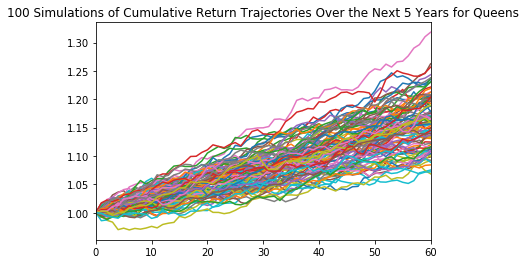

In [26]:
plot_title = f"{x+1} Simulations of Cumulative Return Trajectories Over the Next 5 Years for Queens"
monte_carlo_queens.plot(legend=None, title=plot_title)

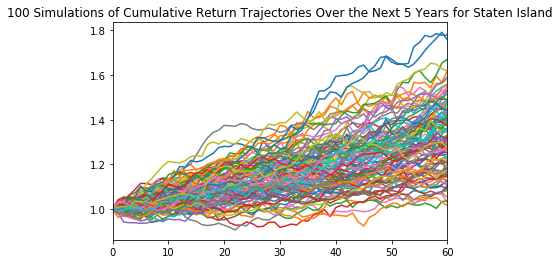

In [27]:
plot_title = f"{x+1} Simulations of Cumulative Return Trajectories Over the Next 5 Years for Staten Island"
monte_carlo_staten_island.plot(legend=None, title=plot_title)

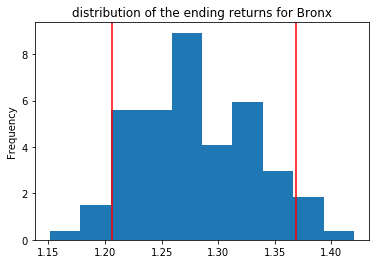

In [28]:
ending_cumulative_returns_bronx=monte_carlo_bronx.iloc[-1]
confidence_interval_bronx = ending_cumulative_returns_bronx.quantile(q=[0.05, 0.95])
plt.figure();
ending_cumulative_returns_bronx.plot(kind='hist', density=True, bins=10,title="distribution of the ending returns for Bronx")
plt.axvline(confidence_interval_bronx.iloc[0], color='r')
plt.axvline(confidence_interval_bronx.iloc[1], color='r')

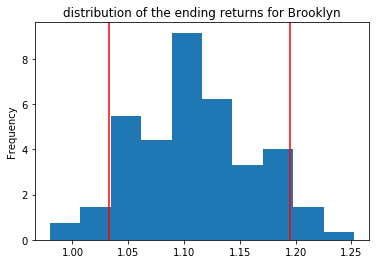

In [29]:
ending_cumulative_returns_brooklyn=monte_carlo_brooklyn.iloc[-1]
confidence_interval_brooklyn = ending_cumulative_returns_brooklyn.quantile(q=[0.05, 0.95])
plt.figure();
ending_cumulative_returns_brooklyn.plot(kind='hist', density=True, bins=10,title="distribution of the ending returns for Brooklyn")
plt.axvline(confidence_interval_brooklyn.iloc[0], color='r')
plt.axvline(confidence_interval_brooklyn.iloc[1], color='r')

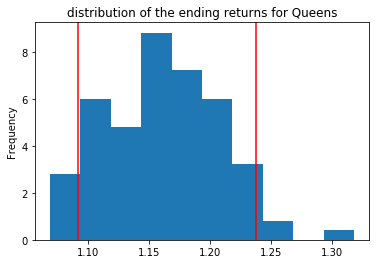

In [30]:
ending_cumulative_returns_queens=monte_carlo_queens.iloc[-1]
confidence_interval_queens = ending_cumulative_returns_queens.quantile(q=[0.05, 0.95])
plt.figure();
ending_cumulative_returns_queens.plot(kind='hist', density=True, bins=10,title="distribution of the ending returns for Queens")
plt.axvline(confidence_interval_queens.iloc[0], color='r')
plt.axvline(confidence_interval_queens.iloc[1], color='r')

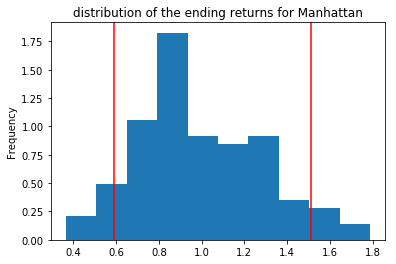

In [31]:
ending_cumulative_returns_manhattan=monte_carlo_manhattan.iloc[-1]
confidence_interval_manhattan = ending_cumulative_returns_manhattan.quantile(q=[0.05, 0.95])
plt.figure();
ending_cumulative_returns_manhattan.plot(kind='hist', density=True, bins=10,title="distribution of the ending returns for Manhattan")
plt.axvline(confidence_interval_manhattan.iloc[0], color='r')
plt.axvline(confidence_interval_manhattan.iloc[1], color='r')

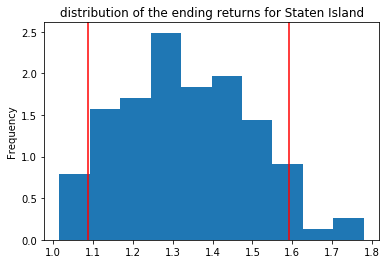

In [32]:
ending_cumulative_returns_staten_island=monte_carlo_staten_island.iloc[-1]
confidence_interval_staten_island = ending_cumulative_returns_staten_island.quantile(q=[0.05, 0.95])
plt.figure();
ending_cumulative_returns_staten_island.plot(kind='hist', density=True, bins=10,title="distribution of the ending returns for Staten Island")
plt.axvline(confidence_interval_staten_island.iloc[0], color='r')
plt.axvline(confidence_interval_staten_island.iloc[1], color='r')

In [35]:
#std for the boroughs
avg_rent_price_per_borough.transpose().pct_change().std()

Borough
Bronx            0.005611
Brooklyn         0.006685
Manhattan        0.041438
Queens           0.004989
Staten Island    0.015250
dtype: float64